<a href="https://colab.research.google.com/github/TheOzzyLot/AH2179/blob/main/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Define the text
lines = [
    'The sun sets over the quiet meadow.',
    'Birds chirp softly in the early morning.',
    'A gentle breeze rustles the autumn leaves.',
    'Stars twinkle brightly in the clear night sky.'
]

# Creat the CountVectorizer instance, the stop_words parameter is set to "english"
# to remove common English stop words like "and", "the", and "a"
vectorizer = CountVectorizer(stop_words='english')

# Convert the text to vectorizer
word_matrix = vectorizer.fit_transform(lines)

# The get_feature_names_out method is used to get the feature names
# (i.e., the individual words) in the word matrix
feature_names = vectorizer.get_feature_names_out()

# The line_names list is created to store the names of each line in the original
# list of strings
line_names = [f'Line {(i + 1):d}' for i, _ in enumerate(word_matrix)]

# A Pandas DataFrame is created using the word_matrix.toarray() method to convert
# the sparse matrix to a dense array
df = pd.DataFrame(data=word_matrix.toarray(), index=line_names,columns=feature_names)

# The head() method is called on the resulting DataFrame to display the first few
# rows of the matrix
df.head()

,autumn,birds,breeze,brightly,chirp,clear,early,gentle,leaves,meadow,morning,night,quiet,rustles,sets,sky,softly,stars,sun,twinkle
Line 1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0
Line 2,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0
Line 3,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
Line 4,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


In [ ]:
import pandas as pd
import os

# The path of the dataset
url = 'https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/Exercise_4_Text_classification/Pakistani%20Traffic%20sentiment%20Analysis.csv'

# Load the data use the pandas
df = pd.read_csv(url)

# Display the data
df.head()

,Text,Sentiment
0,Adayala road is clear,0
1,Traffic jam from parbat rd to nazim-ud-din rd ...,1
2,Mandra is clear,0
3,Fort street is clear,0
4,"Mashriq Hotel towards Fawara Chowk, City Sadda...",1


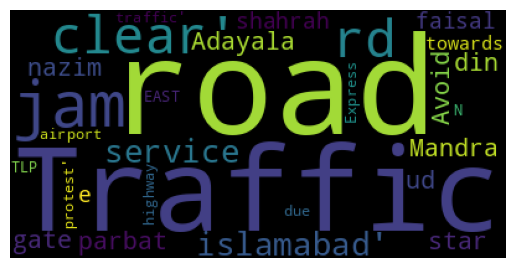

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1010   1008                   Traffic open at shahrah e faisal    2
1          1099   1079  Road is closed for traffic at star gate toward...    3

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text = df['Text'].values

wordcloud = WordCloud().generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()
df.groupby('Sentiment').describe()

In [ ]:
df = df.drop_duplicates()

# Displaying the instances of each class
df.groupby('Sentiment').describe()

Text                                                               
          count unique                                                top freq
Sentiment                                                                     
0          1008   1008                              Adayala road is clear    1
1          1079   1079  Traffic jam from parbat rd to nazim-ud-din rd ...    1

In [ ]:
# Convert the text to vectorizer
x = df['Text']

# Obtain the label
y = df['Sentiment']

LogisticRegression(max_iter=1000, random_state=0)

The accuracy of the model is: 0.937799043062201


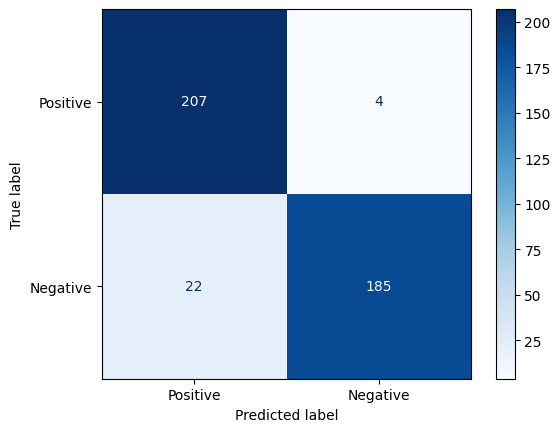

The prediction result of this review is: positive


The accuracy of the model is: 0.937799043062201


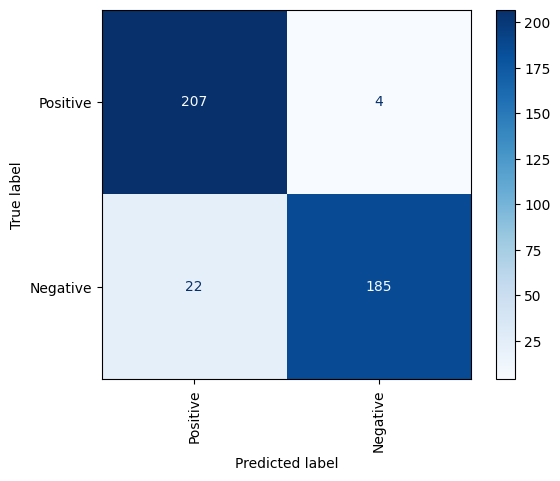

{'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 300}
The accuracy of the model is: 0.9712918660287081


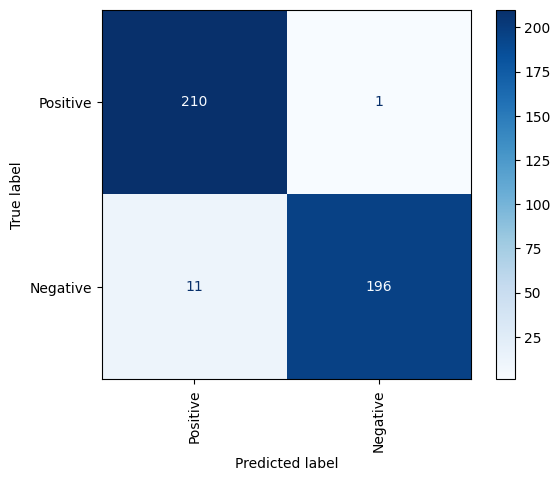

In [45]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import ConfusionMatrixDisplay as cmd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
import os
from sklearn.model_selection import GridSearchCV

#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*

#(1) CountVectorizer
#vectorizer = CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20)

#(2) #HashingVectorizer
vectorizer = HashingVectorizer(ngram_range=(1, 2), n_features=200)

#(3)TfidfVectorizer
#vectorizer = TfidfVectorizer(
#    min_df=20,
#    norm='l2',
#    smooth_idf=True,
#    use_idf=True,
#    ngram_range=(1, 1),
#    stop_words='english'
#    )

#vectorizers = {
#    'Count': CountVectorizer(ngram_range=(1, 2), stop_words='english',min_df=20),
#    'Hashing': HashingVectorizer(ngram_range=(1, 2), n_features=200),
#    'Tfidf': TfidfVectorizer(min_df=20,norm=12,smooth_idf=True,use_idf=True,ngram_raneg=(1,1),stop_words='english')
#}
#-*-*-*-*-*-*chose different vectorization-*-*-*-*-*-*
#models = {
#    'LR': {
#        'model':LogisticRegression(max_iter=100,random_state=0),
#        'param_grid': {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
#    },
#    'KNN': {
#        'model': KNeighborsClassifier(),
#        'param_grid': {'n_neighbors': [3, 5, 7, 9],'weights': ['uniform', 'distance']}
#   },
#    'RF': {
#        'model': RandomForestClassifier(random_state=0),
#        'param_grid': {'n_estimators': [100, 200, 300],'max_depth': [None, 10, 20, 30],'min_samples_split': [2, 5, 10],'min_samples_leaf': [1, 2, 4]}
#    },
#    'XGBoost': {
#        'model': XGBClassifier(),
#        'param_grid': {'learning_rate': [0.01, 0.1, 0.2],'n_estimators': [100, 200, 300],'max_depth': [3, 4, 5]}
#    },
#    'SVC': {
#        'model': SVC(probability=True),
#        'param_grid': {'kernel': ['linear', 'sigmoid', 'poly'],'C': [0.1, 1, 10]}
#    },
#    'Bayes': {
#        'model': BernoulliNB(),
#        'param_grid': {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}
#    }
#}
# split into train/test set
x = df['Text']
y = df['Sentiment']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# apply the vectorizers
x_train_vectorized = vectorizer.fit_transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)


#(1)LR
#model = LogisticRegression(max_iter=1000, random_state=0)
#param_grid = {
#    'C': [0.001, 0.01, 0.1, 1, 10, 100],
#}

#(2)KNN
#model=KNeighborsClassifier()
#param_grid = {
#    'n_neighbors': [3, 5, 7, 9],
#    'weights': ['uniform', 'distance']
#}

#(3)RF
#model = RandomForestClassifier(random_state=0)
#param_grid = {
#    'n_estimators': [100, 200, 300],
#    'max_depth': [None, 10, 20, 30],
#    'min_samples_split': [2, 5, 10],
#    'min_samples_leaf': [1, 2, 4]
#}

#(4)XGBoost
model =  XGBClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5]
}

#(5)SVM
#model= SVC(probability=True)
#param_grid = {'kernel': ['linear', 'sigmoid', 'poly'],'C': [0.1, 1, 10]}

#(6)Naïve Bayes models
#model=BernoulliNB()
#param_grid = {'alpha': [0.1, 0.5, 1],'force_alpha': [True,False]}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_vectorized, y_train)

best_params = grid_search.best_params_
print(best_params)
best_score = grid_search.best_score_

model = grid_search.best_estimator_

model.fit(x_train_vectorized, y_train)
cmd.from_estimator(
    model,
    x_test_vectorized,
    y_test,
    display_labels=['Positive','Negative'],
    cmap='Blues',
    xticks_rotation='vertical'
    )

print('The accuracy of the model is: '+str(accuracy_score(y_test,model.predict(x_test_vectorized))))

In [46]:
# Here you change the reviews
text = 'Adayala road is clear'

# Make a prediction for this review
score=model.predict_proba(vectorizer.transform([text]))[0][1]

if score >0.5:
  attitude='negative'
else:
  attitude='positive'

print('The prediction result of this review is: '+ attitude)

The prediction result of this review is: positive
